In [1]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.LRGSG import Lattice2D, move_to_rootf
from LRGSG_package.config.plotlib import log_binning
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
# L = [16, 32, 64, 128]
# cell = 'single'
# number_of_averages = 1000
# lrgpath = "data/cluster_data/l2d_squared/lrgsg/"

In [16]:
L = [5, 10, 20, 30, 40, 50]
cell = 'rand'
number_of_averages = 10000
lrgpath = "data/cluster_data/l3d_simple_cubic/lrgsg/"

In [17]:

# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob(f'{lrgpath}*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        # Adjust the split index based on your path structure
        subdirectory = filepath.split('/')[4]
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Prepare a list to hold p values and the number of sharing subdirectories
p_values_shared_count = []

# Filter and count p values that appear in at least two different subdirectories
for p_value, dirs in p_values_dirs.items():
    num_shared = len(dirs)
    if num_shared >= 2:
        p_values_shared_count.append((p_value, num_shared))

# Sort the list by p value
p_values_shared_count.sort()

# Print p values and their shared count
for p_value, count in p_values_shared_count:
    print(f"p={p_value} is shared by {count} subdirectories")

p=0.2 is shared by 6 subdirectories
p=0.211 is shared by 6 subdirectories
p=0.222 is shared by 6 subdirectories
p=0.233 is shared by 6 subdirectories
p=0.244 is shared by 6 subdirectories
p=0.256 is shared by 6 subdirectories
p=0.267 is shared by 6 subdirectories
p=0.278 is shared by 6 subdirectories
p=0.289 is shared by 6 subdirectories
p=0.3 is shared by 6 subdirectories


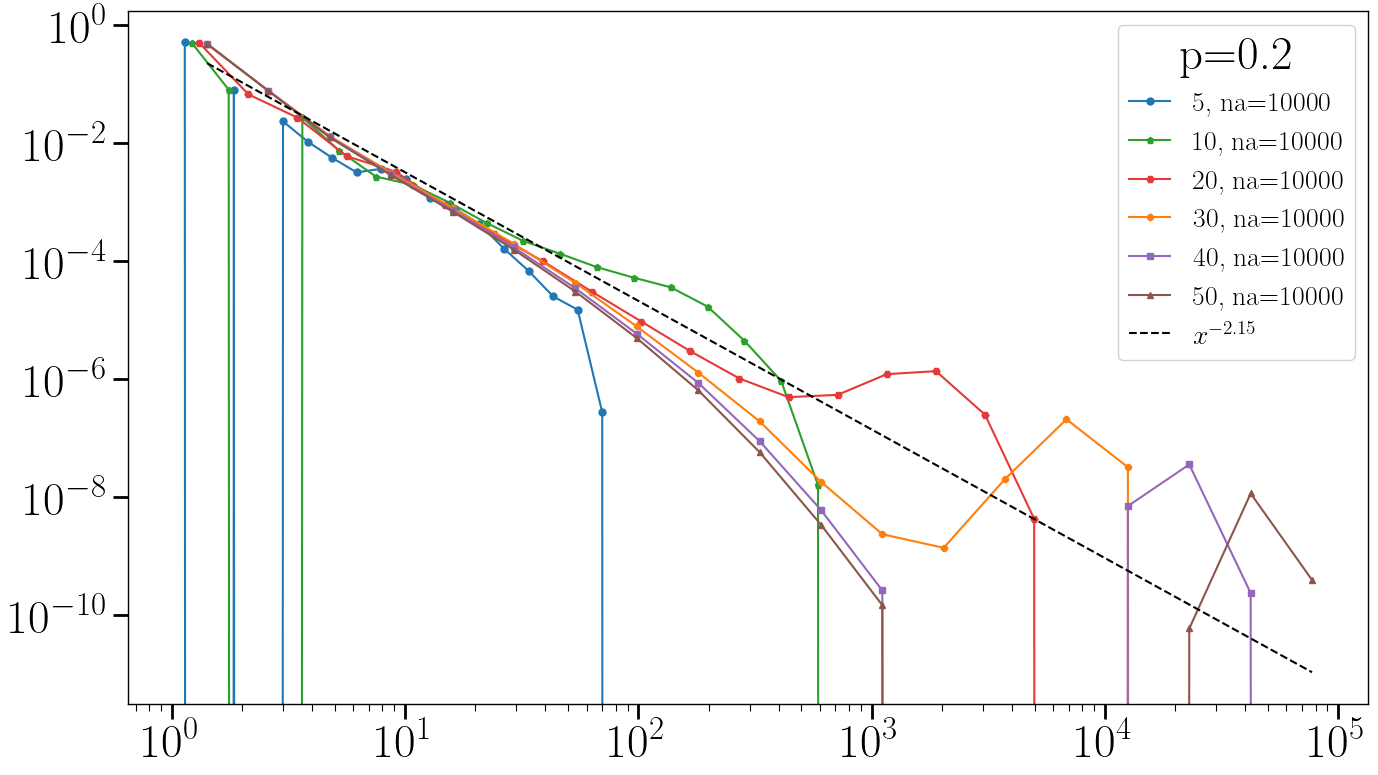

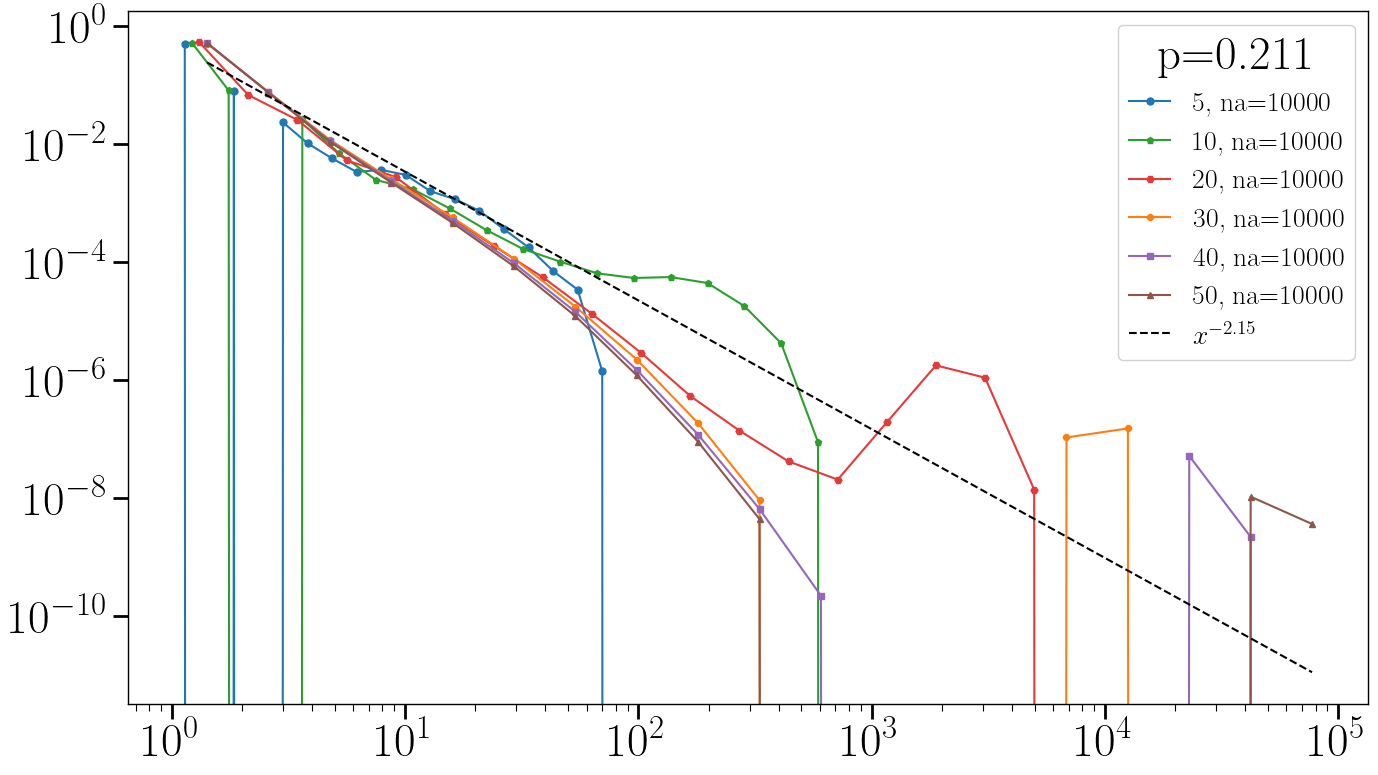

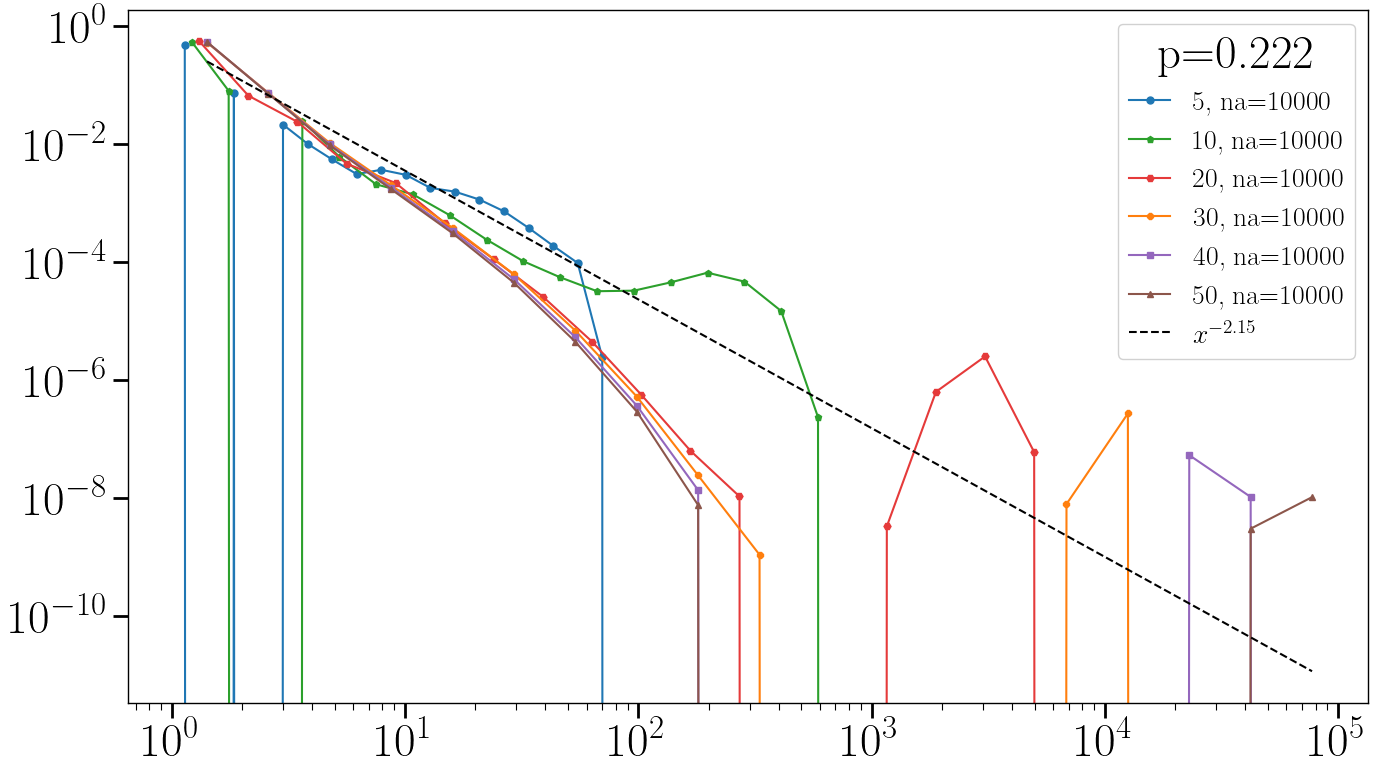

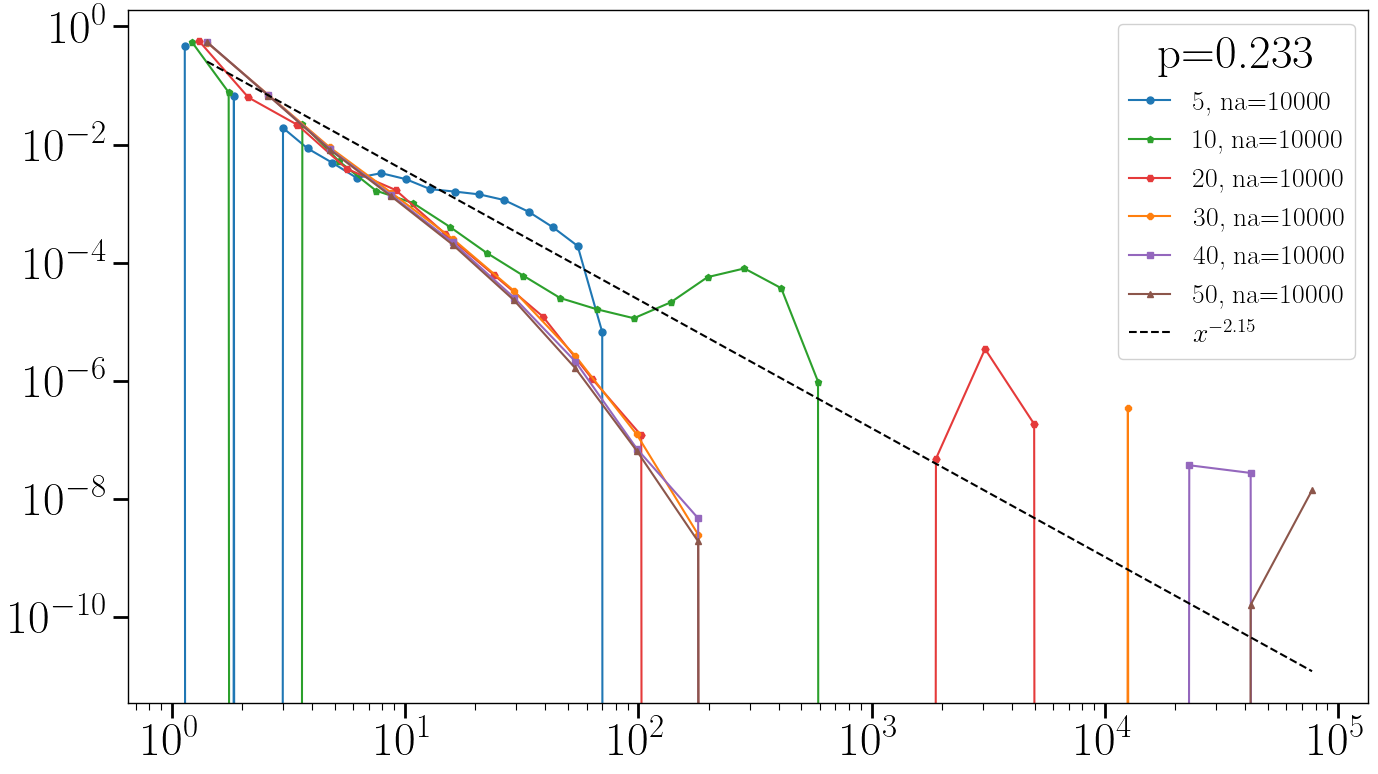

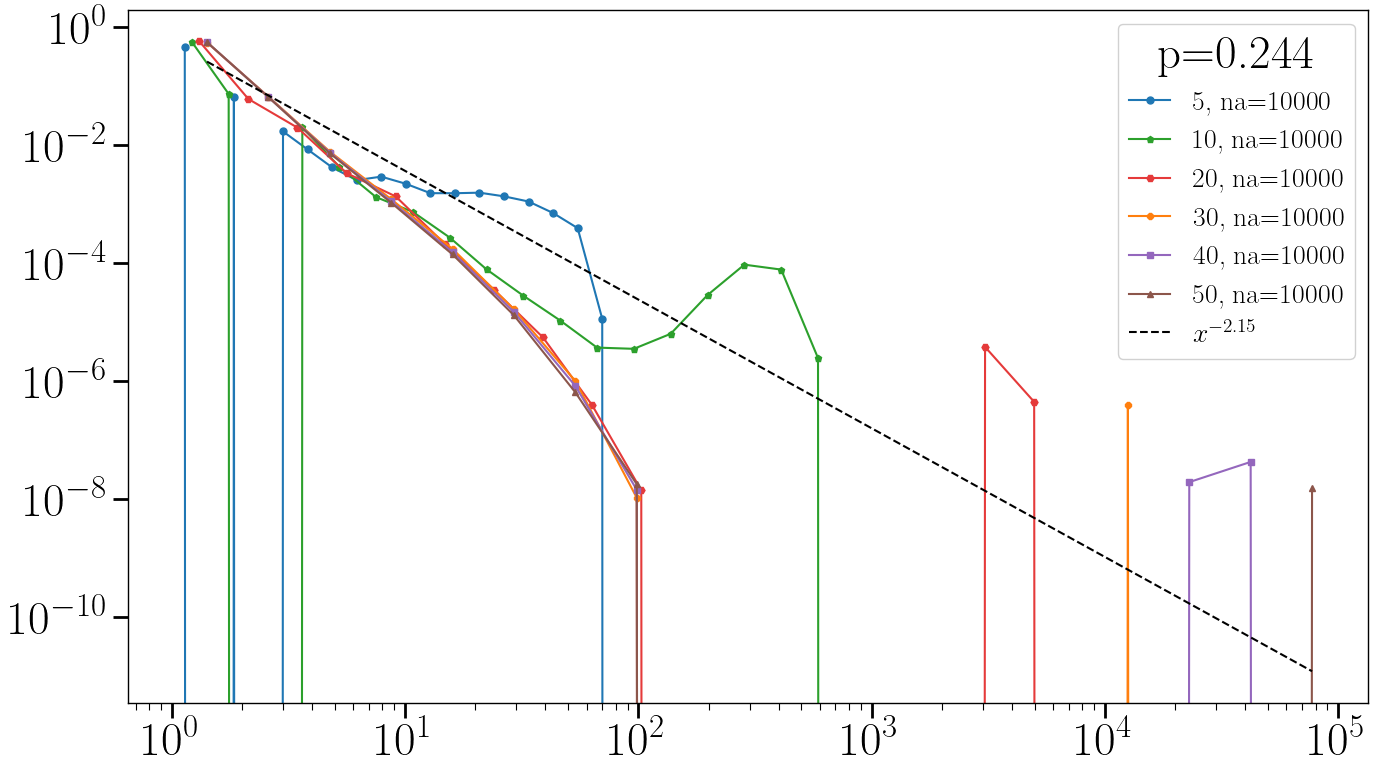

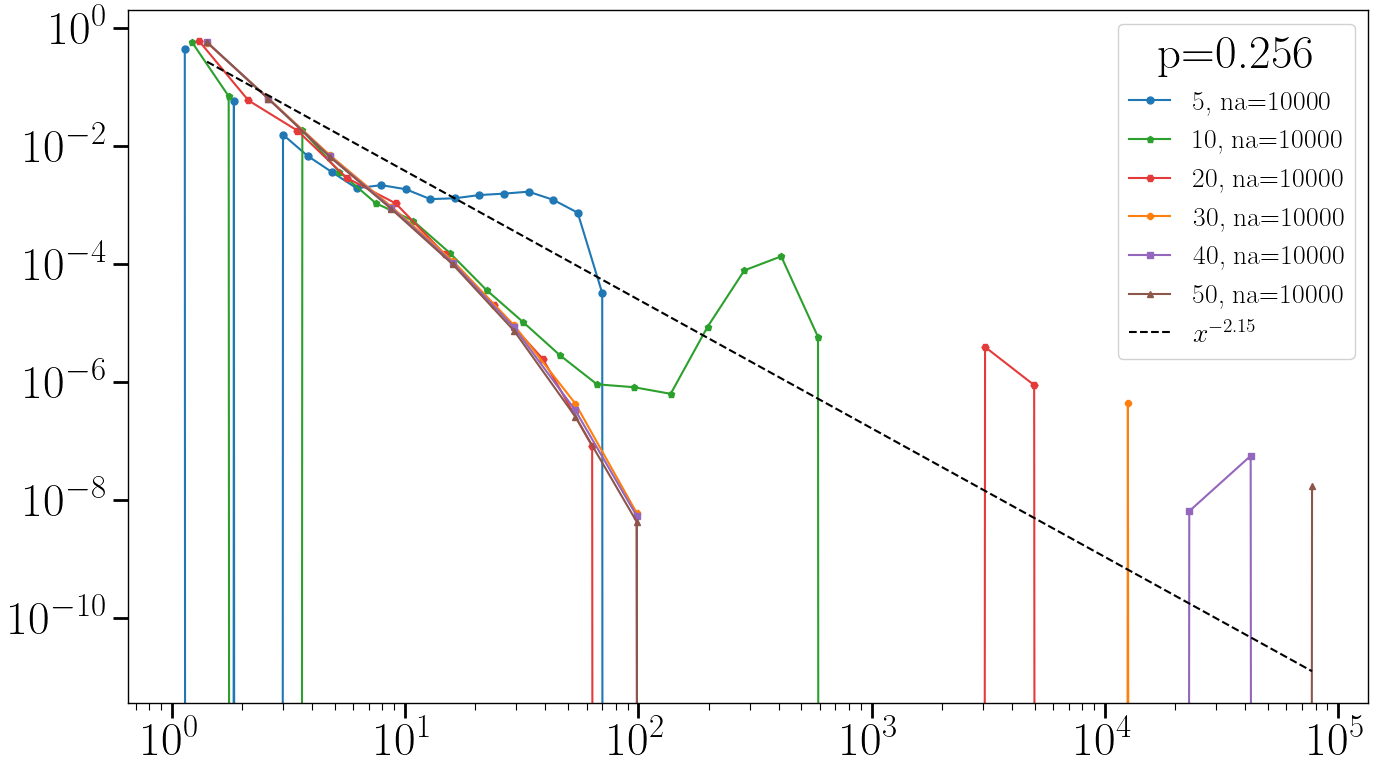

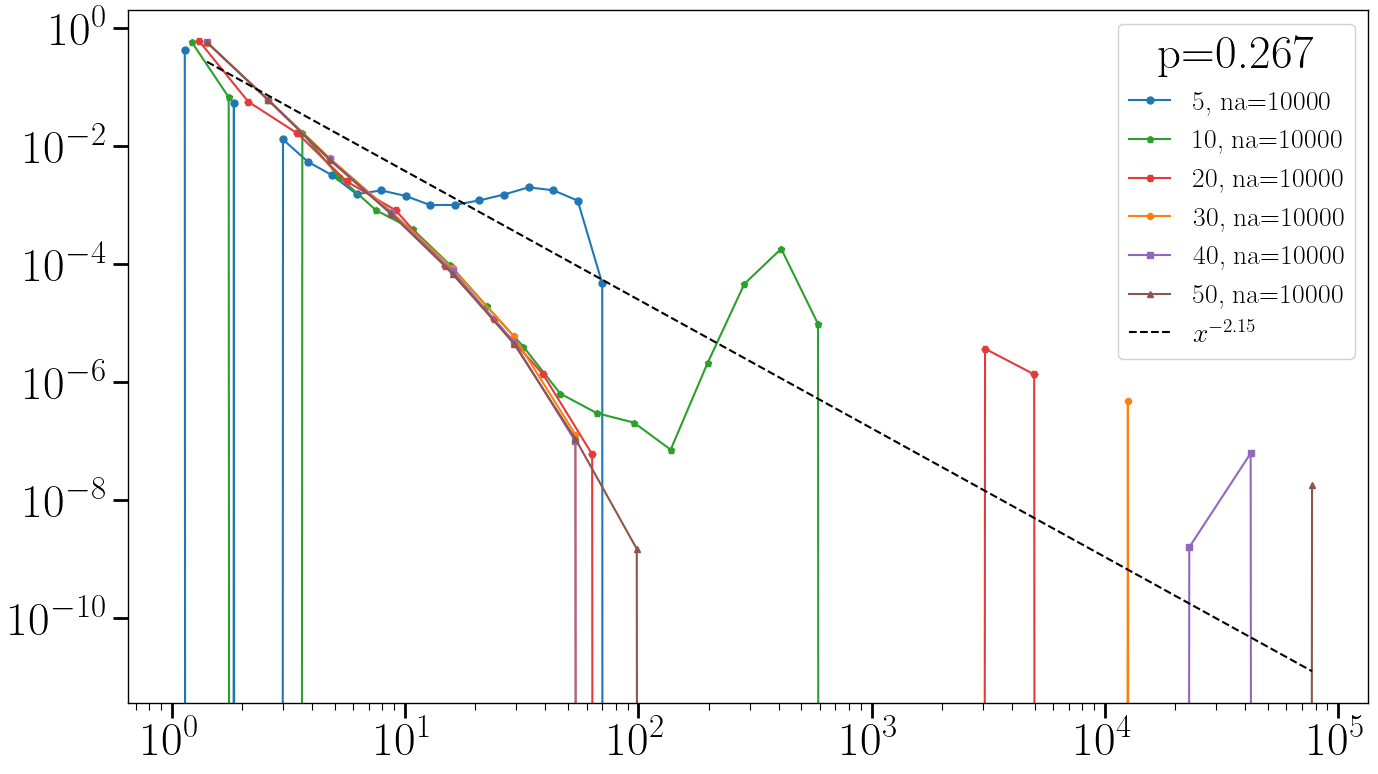

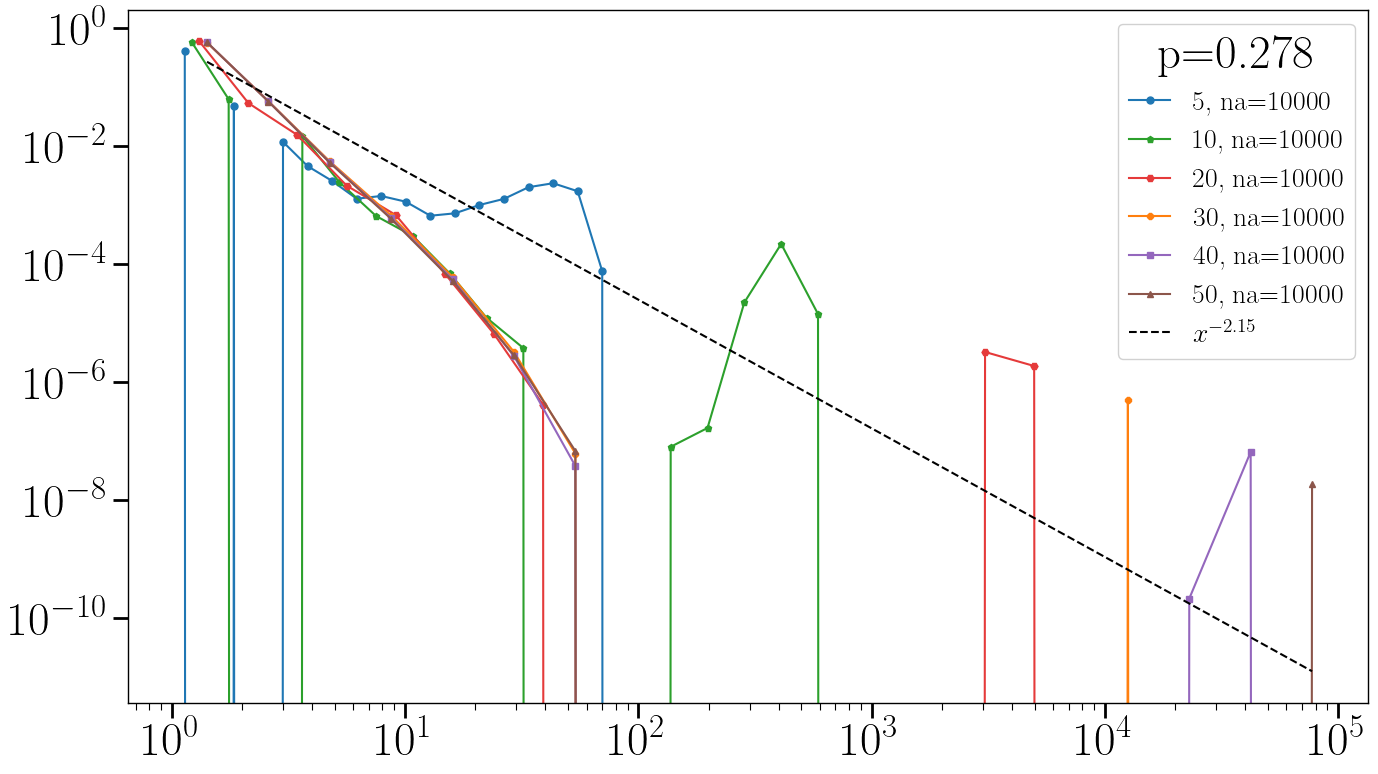

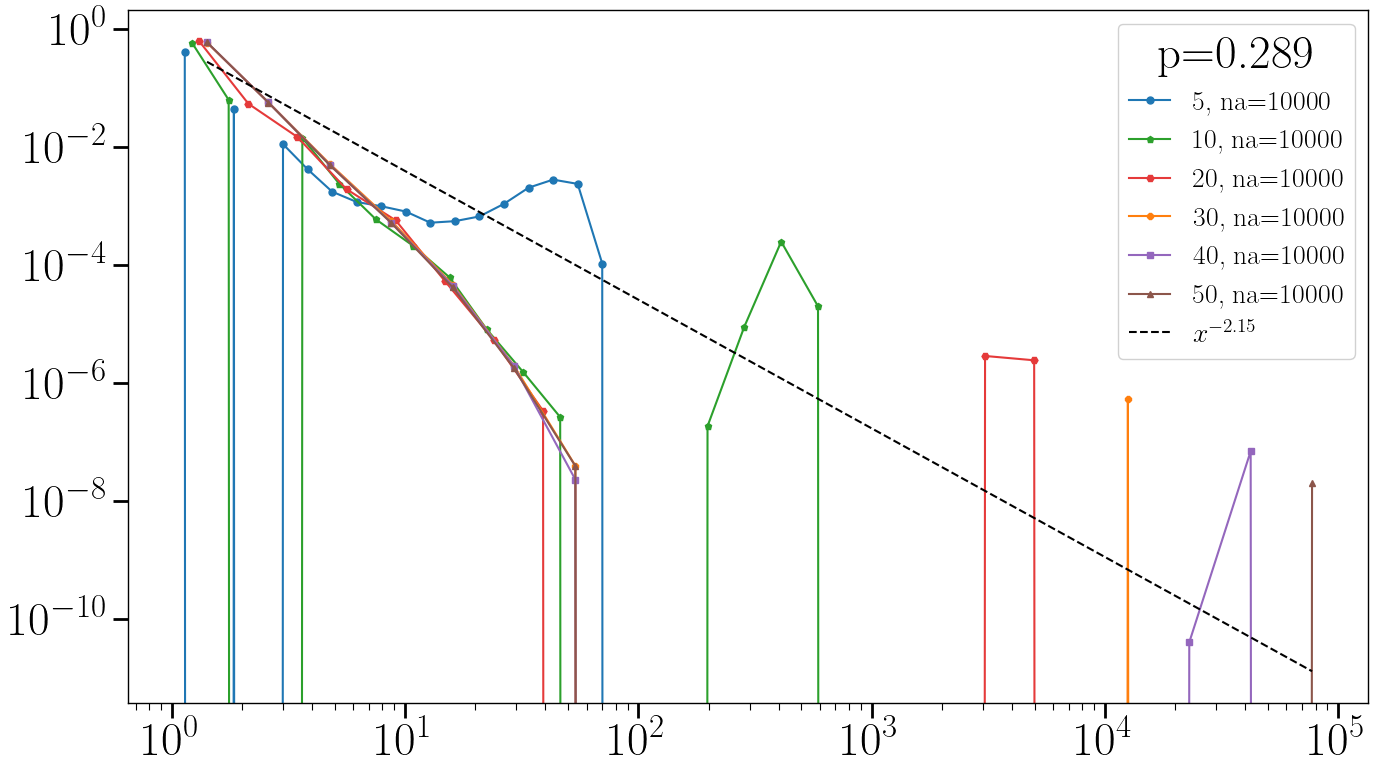

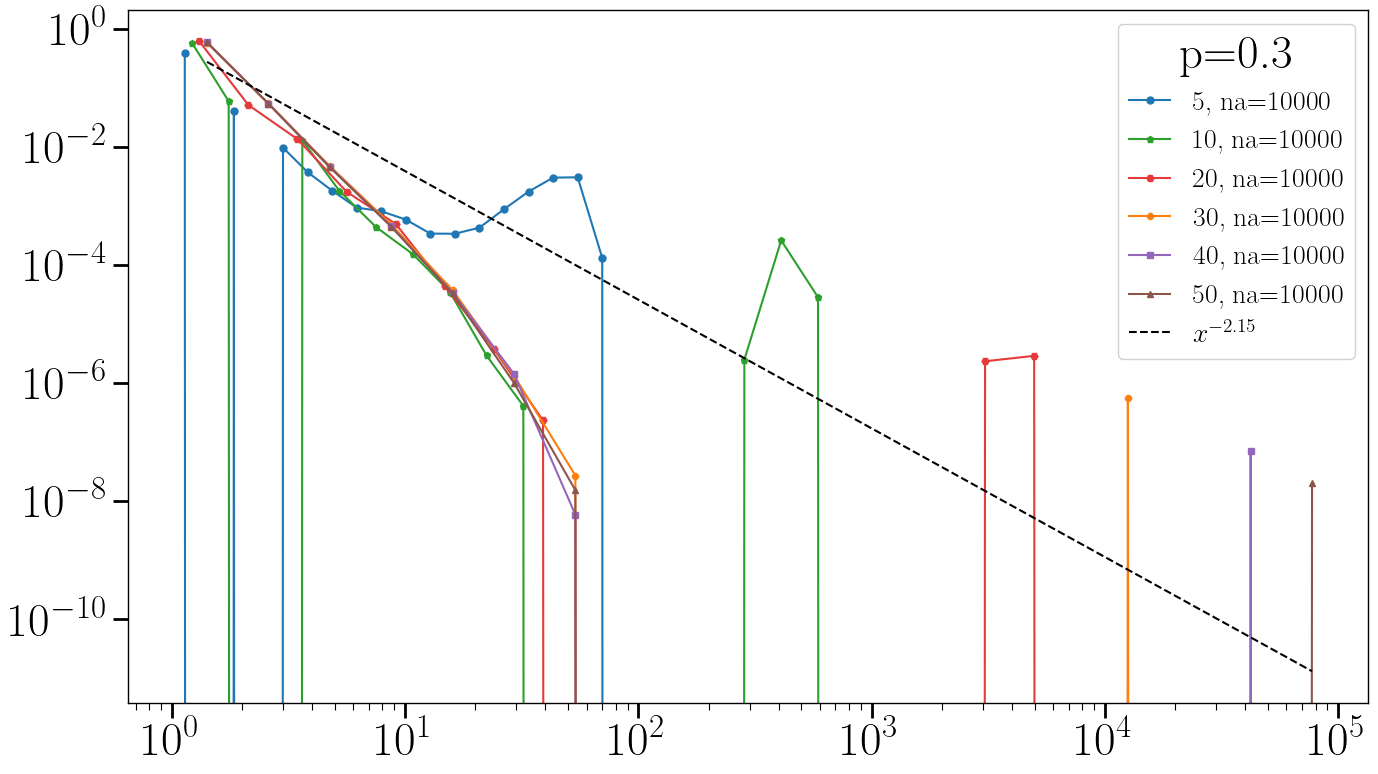

In [25]:
cell = 'rand'
p_pattern = re.compile(r'p=([0-9.]+)')
na_pattern = re.compile(r'na=([0-9]+)')
fit_exponent = -2.18
number_of_averages = 10000
for p,_ in p_values_shared_count:
    plt.figure()
    for side in L:
        fpath = f"{lrgpath}N={side**3}/"
        listfname = os.listdir(fpath)
        # Compile regular expressions for matching p and na values
        for file_name in listfname:
            p_match = p_pattern.search(file_name)
            na_match = na_pattern.search(file_name)
            if p_match and na_match:
                na = int(na_match.group(1))
        # pairs now contains all the (p, na) tuples
        fpath = f"{fpath}pCluster_p={p:.3g}_{cell}_na={na}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pk.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        # plt.plot(sizes, counts, label=f"{side}")
        # fit1 = powerlaw.Fit(data, xmin=1, xmax=side**2, discrete=True, fit_method='KS')
        # bins1, prob1 = fit1.pdf(linear_bins=False)
        # bins1 = (bins1[1:]+bins1[:-1])/2.0
        # prob1[prob1 == 0] = 'nan'
        # plt.plot(bins1, prob1, label=f"{side}, {fit1.alpha:.3g}")
        try:
            bc, h, bw = log_binning(data, binnum=20)
            h = h/bw
            h = h/np.sum(bc*h)
            # h = h[np.where(h>0)[0]]
            # bc = bc[np.where(h>0)[0]]
            plt.plot(bc, h, label=f"{side}, na={na}")
        except ValueError:
            pass
    # try:
    plt.plot(bc, h[0]*bc.astype(float)**fit_exponent, 'k--', label=r"$x^{-2.15}$")
    # except IndexError:
    #     pass
    # plt.plot(bins1, prob1[0]*bins1**(-2.18), 'k--')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(fontsize=20, title=f"p={p:.3}")
    plt.show()

In [12]:
lrgpath = "data/cluster_data/l2d_squared/lrgsg/"
# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob(f'{lrgpath}*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        # Adjust the split index based on your path structure
        subdirectory = filepath.split('/')[4]
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Prepare a list to hold p values and the number of sharing subdirectories
p_values_shared_count = []

# Filter and count p values that appear in at least two different subdirectories
for p_value, dirs in p_values_dirs.items():
    num_shared = len(dirs)
    if num_shared >= 2:
        p_values_shared_count.append((p_value, num_shared))

# Sort the list by p value
p_values_shared_count.sort()

# Print p values and their shared count
for p_value, count in p_values_shared_count:
    print(f"p={p_value} is shared by {count} subdirectories")

p=0.09 is shared by 8 subdirectories
p=0.0958 is shared by 8 subdirectories
p=0.102 is shared by 8 subdirectories
p=0.107 is shared by 8 subdirectories
p=0.113 is shared by 8 subdirectories
p=0.119 is shared by 8 subdirectories
p=0.125 is shared by 8 subdirectories
p=0.131 is shared by 8 subdirectories
p=0.136 is shared by 8 subdirectories
p=0.142 is shared by 8 subdirectories
p=0.148 is shared by 8 subdirectories
p=0.154 is shared by 8 subdirectories
p=0.159 is shared by 8 subdirectories
p=0.165 is shared by 8 subdirectories
p=0.171 is shared by 8 subdirectories
p=0.177 is shared by 8 subdirectories
p=0.183 is shared by 8 subdirectories
p=0.188 is shared by 8 subdirectories
p=0.194 is shared by 8 subdirectories
p=0.2 is shared by 8 subdirectories


### Plot sizes count

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


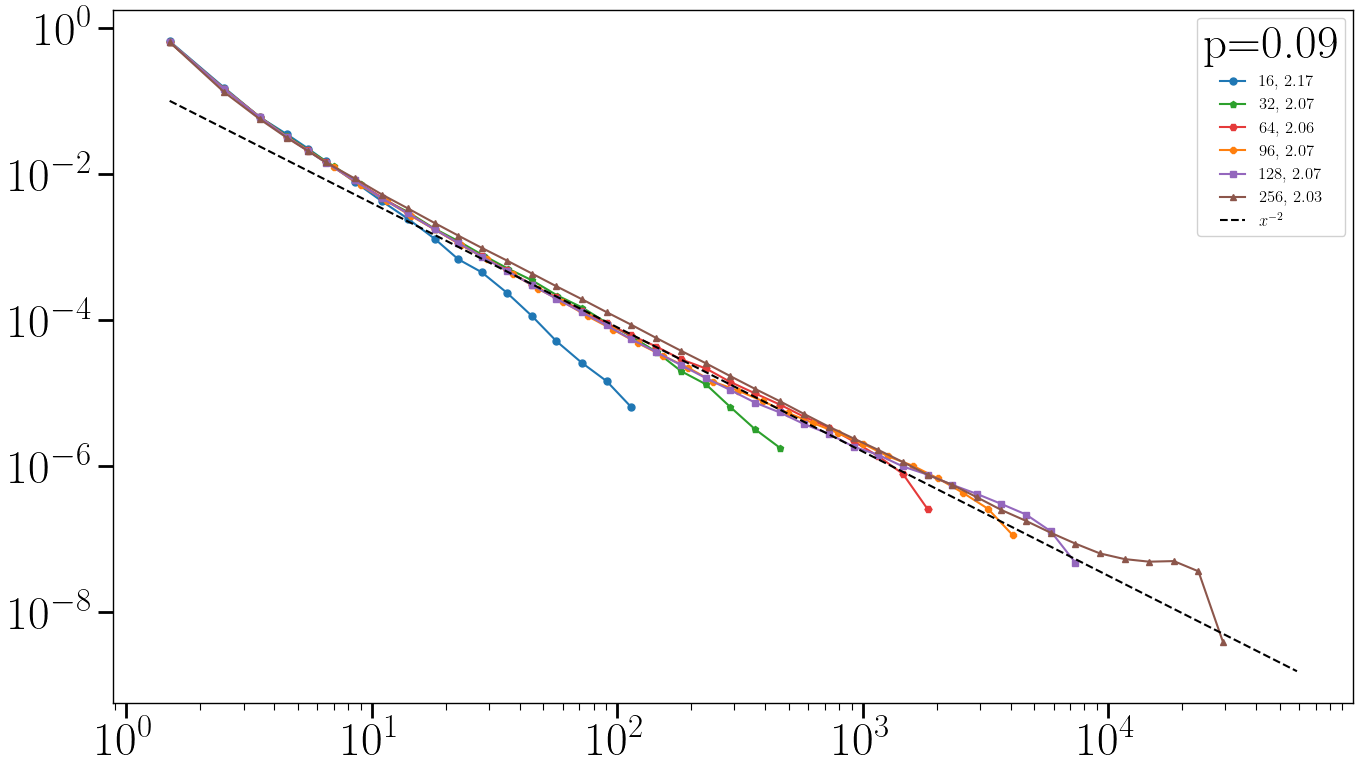

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


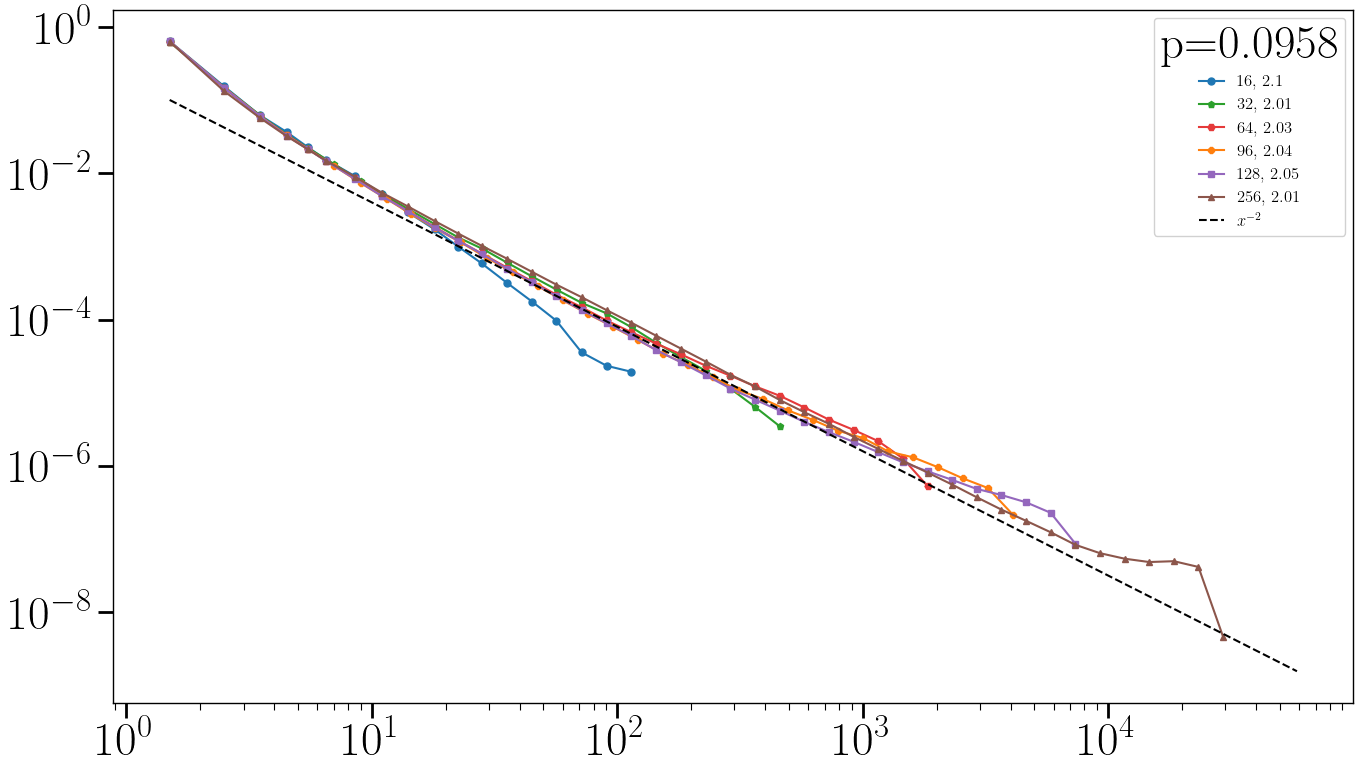

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


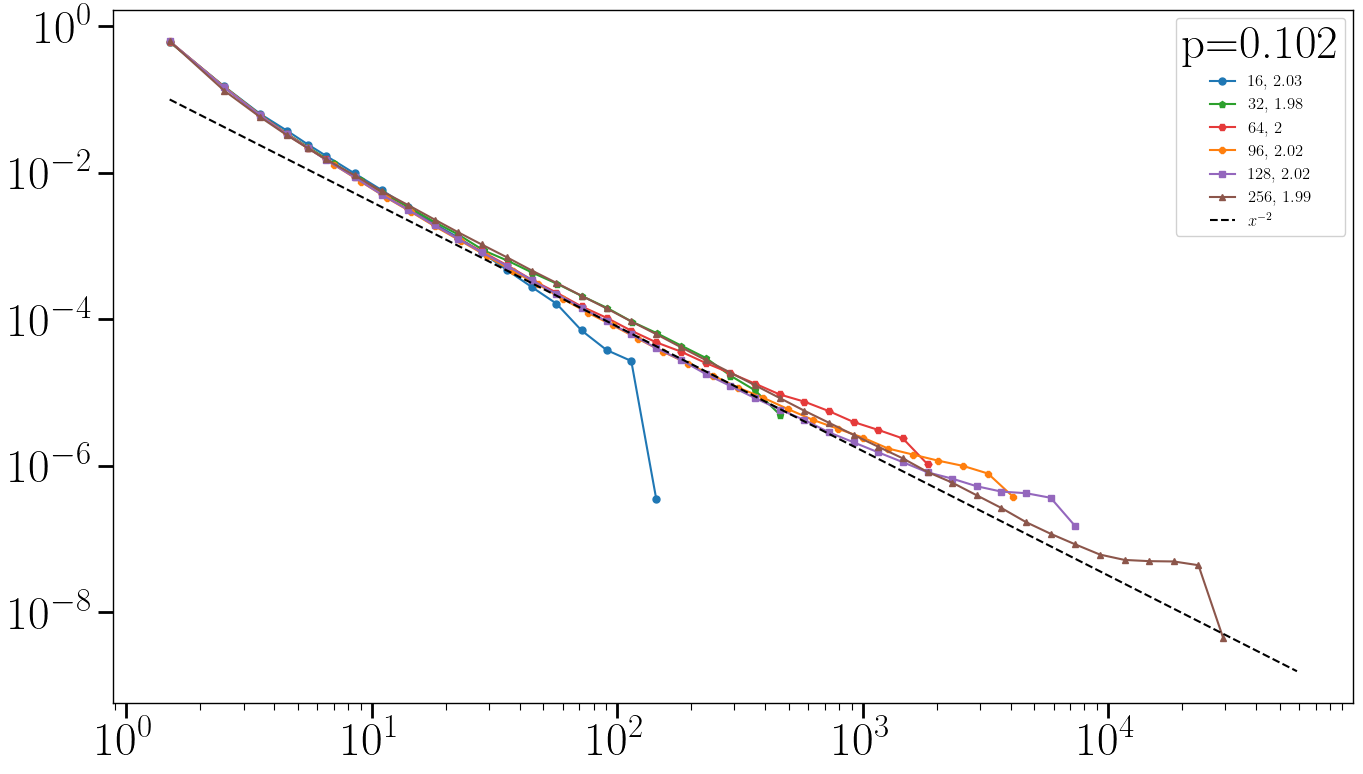

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


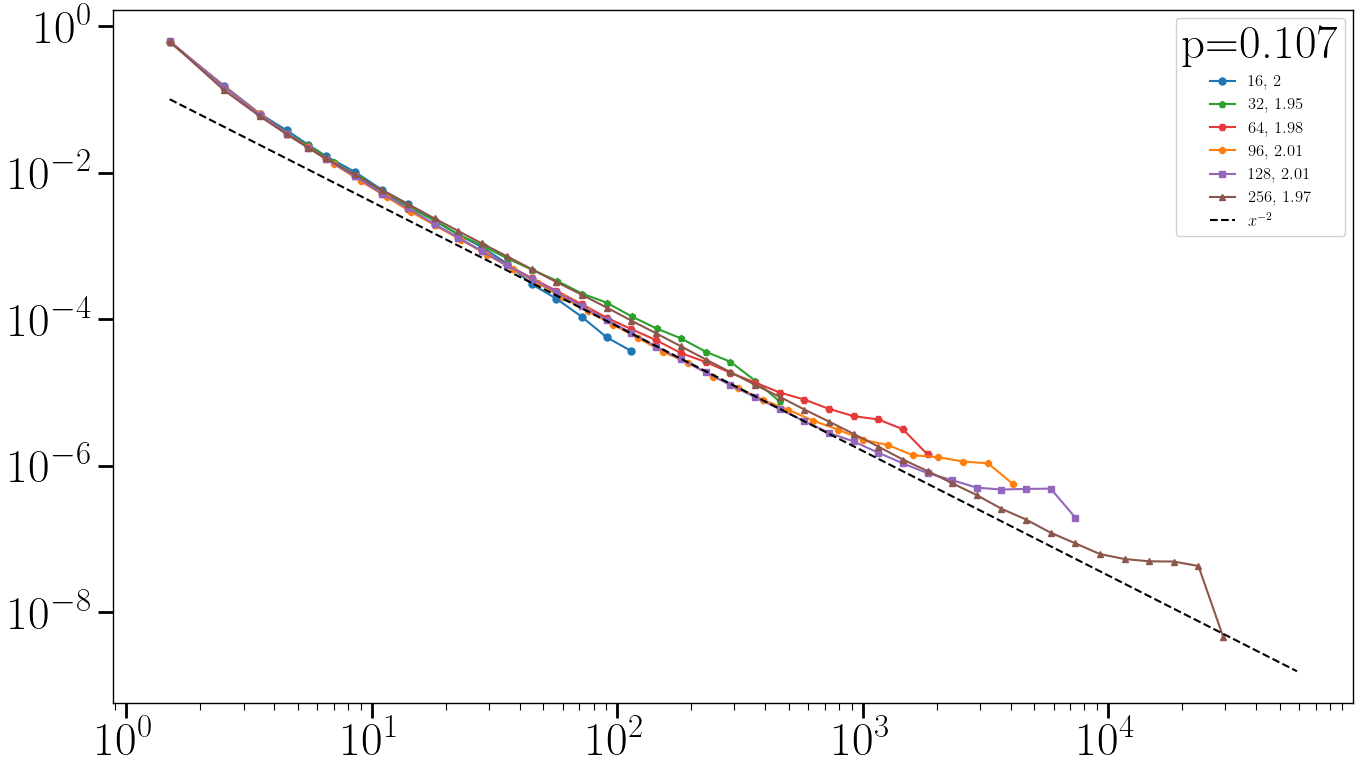

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


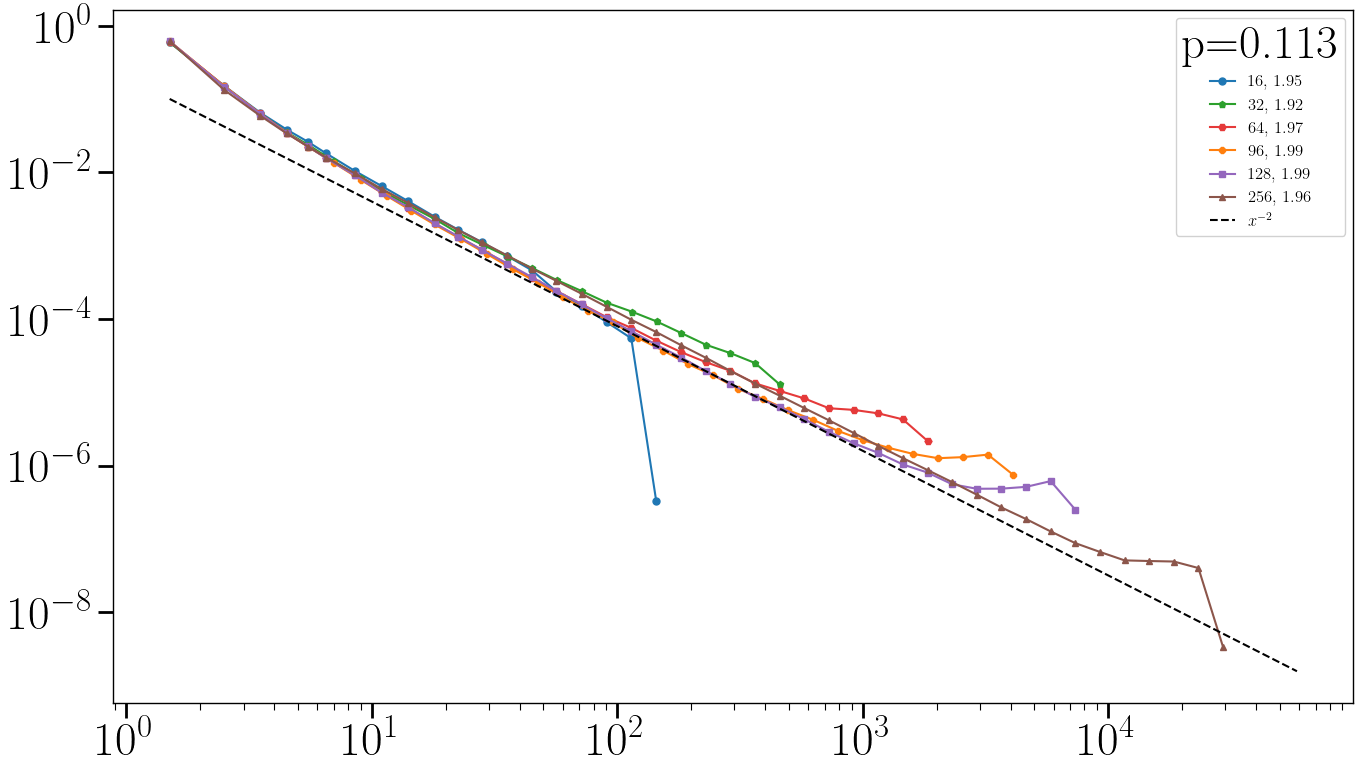

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


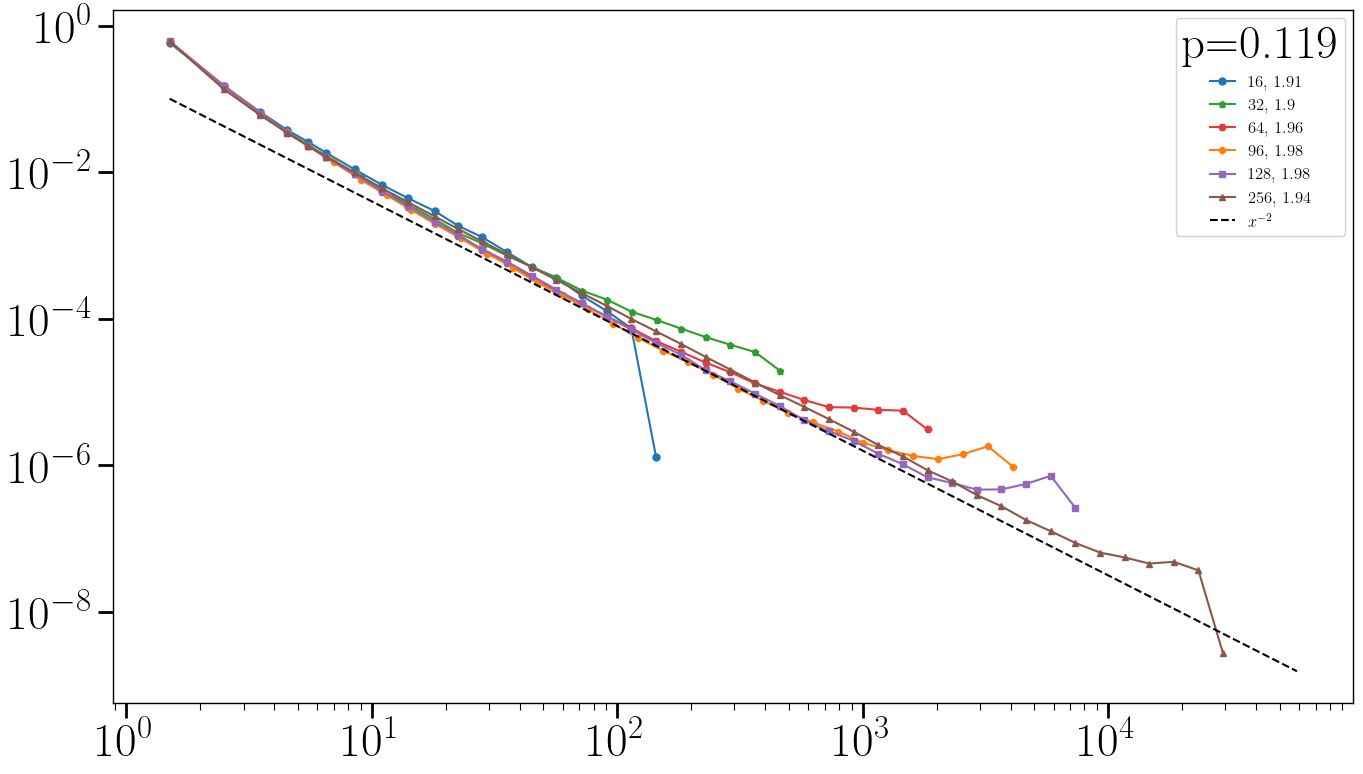

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


KeyboardInterrupt: 

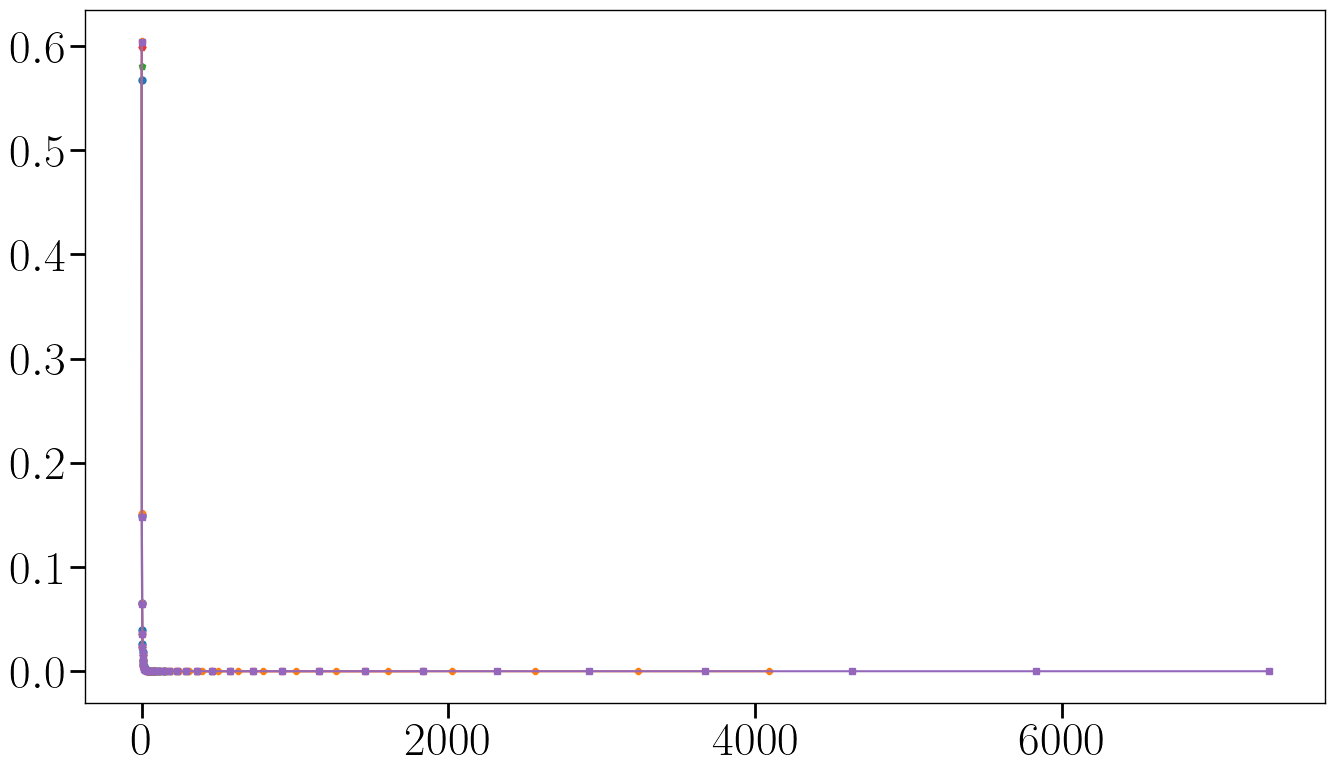

In [13]:

cell = 'rand'
number_of_averages = 10000
for p,_ in p_values_shared_count:
    plt.figure()
    for side in [16, 32, 64, 96, 128, 256]:
        fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pk.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        # plt.plot(sizes, counts/side**2, label=f"{side}")
        # try:
        # bc, h, bw = log_binning(data, binnum=20)
        # h = h/bw
        # h = h/np.sum(bc*h)
        # h = h[np.where(h>0)[0]]
        # bc = bc[np.where(h>0)[0]]
        # fit = powerlaw.Fit(data)

        # # PDF of the fitted power-law distribution
        # # x_min is the lower bound for fitting the power-law
        # # pdf = fit.power_law.pdf(fit.xmins)        # except ValueError:
        # x_min = fit.xmin
        # x_max = max(data)
        # x = np.linspace(fit.xmin, max(data), 1000)
        # pdf = fit.power_law.pdf(x)
        # plt.plot(x, pdf, 'r-', label='Power-law PDF')
        fit1 = powerlaw.Fit(data, xmin=1, xmax=side**2, discrete=True, fit_method='KS')
        bins1, prob1 = fit1.pdf(linear_bins=False)
        bins1 = (bins1[1:]+bins1[:-1])/2.0
        prob1[prob1 == 0] = 'nan'
        plt.plot(bins1, prob1, label=f"{side}, {fit1.alpha:.3g}")
        # plt.scatter(data, np.zeros_like(data), alpha=0.1)
        #     pass
    plt.plot(bins1, 0.2*bins1**(-1.7), 'k--', label=r"$x^{-2}$")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title=f"p={p:.3g}")
    plt.show()

In [ ]:
for p,_ in p_values_shared_count:
    plt.figure()
    for side in [8, 16, 32, 64, 128]:
        fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pickle.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        x, y, w = log_binning(data)
        plt.plot(x, y/w/y[0], label=f"{side}")
    plt.plot(x, (y/w)[0]*x**(-2)/y[0], label=f"-2")
    # plt.ylim(bottom=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title=f"p={p:.3g}")
    plt.show()

In [ ]:
# data = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_single.txt", delimiter=',')#data/cluster_data/l2d_triangular/phtra/L1=128_L2=64
# data2 = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_hexagon.txt", delimiter=',')

# data = data[data[:, -2].argsort()]
# data2 = data2[data2[:, -2].argsort()]
# plt.plot(data[:, -2], gaussian_filter(data[:, 1],sigma=0), '-')
# plt.plot(data2[:, -2], gaussian_filter(data2[:, 1],sigma=0), '-')

# # plt.axvline(0.065)

In [ ]:
side = 128
p = 0.0671
cell = 'single'
number_of_averages = 1000
fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
try:
    with open(fpath, 'rb') as file:
        data = pickle.load(file)
except:
    print('no data found')

In [ ]:
sizes, counts = map(np.array, zip(*sorted(data.items())))
data = np.repeat(sizes, counts)

In [ ]:
plt.figure(figsize=(8, 6))

p = 0.192#p_values_filtered[3]
cell = 'single'
number_of_averages = 1000
for side in [8, 16, 32, 64, 128]:
    fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        print('no data found')
        continue
    sizes, counts = map(np.array, zip(*sorted(data.items())))
    data = np.repeat(sizes, counts)
    try:
        # sorted_indices = np.argsort(data)[::-1]
        # sorted_data = data[sorted_indices]
        # # Generate ranks for each size
        # ranks = np.arange(1, len(data) + 1)
        # Make the rank-size plot
        # plt.loglog(ranks, sorted_data, marker='o', linestyle='-', color='b')
        fit = powerlaw.Fit(data, xmax=side**2)
        figCCDF = fit.plot_ccdf(linewidth=3, label=f"{side}: {fit.alpha:.3g}")
        fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
    except:
        pass
plt.legend()

In [ ]:
fit = powerlaw.Fit(data)
R, p = fit.distribution_compare('power_law', 'exponential')

In [ ]:
p

In [ ]:
import glob
import re
from collections import defaultdict

# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob('data/cluster_data/l2d_squared/lrgsg/*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        subdirectory = filepath.split('/')[4]  # Adjust the index based on your path structure
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Filter out p values that do not appear in at least two different subdirectories
p_values_filtered = [p for p, dirs in p_values_dirs.items() if len(dirs) >= 2]

# Sort the values
p_values_filtered = sorted(p_values_filtered)

print(p_values_filtered)


In [ ]:
p_values_dirs

In [ ]:


# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# List to hold all found p values
p_values = []

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob('data/cluster_data/l2d_squared/lrgsg/*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract and store the p value
        p_values.append(float(match.group(1)))

# Remove duplicates and sort the values
p_values = sorted(set(p_values))

print(p_values)

In [ ]:
side = 64
cmap = plt.cm.twilight
colors = cmap(np.linspace(0.2, 0.8, len(p_values)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)
pval_real = []
for p in p_values:
    cell = 'single'
    number_of_averages = 1000
    fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
        # plt.plot(sizes, counts)
    arr = []
    data = np.repeat(sizes, counts)
    try:
        fit = powerlaw.Fit(data/np.max(data))
        # fit.plot_pdf(linewidth=2)
        # x, y, w = log_binning(data, binnum=10)
        if 0.09 < p < 0.15:
            # plt.plot(x, y/w, marker='.')
            fit = powerlaw.Fit(data/np.max(data))
            figCCDF = fit.plot_ccdf(linewidth=3)
            fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
            # fit.plot_pdf(color='b', linewidth=2)
            # fit.power_law.plot_pdf(color='r', linestyle='--')
        # Print the xmin value of the fit
        arr.append([p, fit.alpha])
    except ValueError:
        continue
    pval_real.append(p)
    # else:
    #     plt.plot(sizes, counts, c='red', zorder=10)
x = np.logspace(0, 3)
cmap = plt.cm.twilight
cmap_val = cmap(np.linspace(0.2, 0.8, len(pval_real)))
custom_cmap = LinearSegmentedColormap.from_list("custom_twilight", cmap_val)
# cmap_tra = create_custom_colormap(c1="#02a618", c2="#00eeff")
cmap_nrm = Normalize(vmin=min(pval_real), vmax=max(pval_real))
plt.colorbar(ScalarMappable(norm=cmap_nrm, cmap=custom_cmap),  ax=plt.gca(), orientation='vertical')
# plt.plot(x,5*10**5*x.astype(float)**(-2.), 'k--', zorder=11)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
for i,j in arr:
    print("p: ", i, " - alpha: ", j)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# plt.ylim(bottom=0.01)

In [ ]:
number_of_averages = 1000
merged_dict = Counter()
for L in [8, 16, 32, 64, 128]:
    for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(L, pflip=p, dataOutdir="data/cluster_data_perc/",  init_weight_dict=False)
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        print(filename)
        if os.path.exists(filename):
            print('reading')
            with open(filename, 'rb') as file:
                data = pickle.load(file)

In [ ]:
p = 0.103
#
for side, bins in zip(reversed([32, 64, 128, 256, 512, 724, 1024]), reversed([5, 10, 10, 6, 8, 10, 10, 10])):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={number_of_averages}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    print(np.max(sizes), side**2)
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
    plt.plot(sizes, counts)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [ ]:


# Normalize counts to probabilities
total_counts = np.sum(counts)
probabilities = counts / total_counts

# Replicate sizes based on normalized probabilities for log binning
# Using np.repeat and multiplying probabilities by a large number to simulate replication
replicated_sizes = np.repeat(np.array(sizes), (probabilities * 10000).astype('int64')) 

# Perform log binning on the replicated distribution
bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=20)

# Plot the log-binned data using plt.plot
plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2)  # Normalizing y-values by bin width
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Normalized Count')
plt.title('Log-Binned Normalized Distribution')
plt.show()


In [ ]:
p = 0.034
#
for side in reversed([32, 64, 128, 256, 512, 724]):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    plt.plot(sizes, counts)
#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 4e6*x**(-1.95))
plt.xscale('log')
plt.yscale('log')